In [1]:
import timeit
import sys
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Question 1

Below is an iterative algorithm to compute the factorial of a positive number. The factorial of an integer n is defined as the product of the integers from 1 to n. 

__algorithm__ *factorial(n)*<br>
__input:__ n, a natural number<br>
__Output:__ the nth factorial number<br>
1: if *n* = 1 then<br>
2:    __return__ 1<br>
3: else<br>
4:    __return__ n* factorial(n-1)<br>
5: endif<br>

Question 2

In the cell below is an iterative factorial function. This function takes the value n as an argument. The variable fact is initialised to the value of n. The function uses a while loop to iteratively decrease the value of n by 1 and assign fact to the value of fact multiplied by n. When the value of n is no longer greater than 1 the factorial value is returned. 

In [2]:
def iterative_fact(n):
    fact = n
    
    #while n is greater than zero decrement n 
    #multiply fact by n
    
    while n > 1:
        n -= 1
        fact = fact*n
    return fact

Below is a non-tail recursive algorithm to compute the factorial of n. As explained in lecture 6, a non-tail recursive function is one which still has further processing to do after the function returns. This is seen in the function below where an additional multiplication by n is performed after the recursive call is completed. 

This function takes n as an argument. If n is equal to 1 then the value 1 is returned. This is the base case and when it is reached no further function calls are made.  

In [3]:
def non_tail_recursive_fact(n):
    #this is the base case
    if n == 1:
        return 1
    else:
        #multiplication by n occurs after recursively calling the function
        return n*non_tail_recursive_fact(n-1)

Below is a tail-recursive algorithm to caculate the factorial of a number. Tail recursive means that any recursive call made within the function is the last thing executed by the function. (ref book) 

As explained in lecture 6, tail recursive calls do not need to be added to the call stack. Only the current call is in the stack. 

The tail recursive function takes two arguments. The second argument accumulates the factorial value. When the base case is reached, the accumulator is returned. In the function below I have initialised the accumulator to 1. 


FIX UP

In [4]:
def tail_recursive_fact(n, acc = 1):
    
    #this is the base case
    if n == 1: 
        #return accumulator when base case reached
        return acc
    else:
        #recursively call the function giving it two arguments
        #second argument is accumulator
        return tail_recursive_fact(n-1, n*acc)
        

I have changed the recursion limit from pythons default value of 1000 to 1500 in order to investigate the running times further. 

https://stackoverflow.com/questions/3323001/what-is-the-maximum-recursion-depth-in-python-and-how-to-increase-it


In the cell below I have created a function called time_factorial to time the factorial functions implemented above using the timeit module. As described at https://docs.python.org/2/library/timeit.html, the timeit module takes a primary statement, a setup statement and the number of times to execute the primary statement.

The setup statement is executed only once. The primary statement refers to 'mycode' below and is set equal to a function and an argument. I have set the number to 1000. A single floating point value is returned by the time_factorial function representing the amount of time it took to execute the primary statement 1000 times. I then divide each element in the list of times by 1000 to get the time taken for a single iteration of the function. 

Two lists are created within the time_factorial function. n is a list of indexes and times is a list of times. As the function can only return one thing, a nested list is returned containing these two lists. 

In [5]:
#change recursion limit
# sys.setrecursionlimit(2000)

def time_factorial(func):

    #function name passed as string and concatenated to setup
    setup = "from __main__ import " + func
    
    #initalise empty lists for times and n
    times = []
    n = []
    
    # run each function 1500 times
    # time each run 200 times
    for i in range(1,300):
        
        #append i to the list n
        n.append(i)
        mycode = func +"(" + str(i) + ")"
        times.append(timeit.timeit(setup = setup, 
                                  stmt = mycode, 
                                  number = 1000))
    
    #get time taken for a single iteration of the factorial 
    number_timed = 1000
    fact_times = [x/number_timed for x in times]
    #return a list containing the lists n and times
    return [n, fact_times]



In the cell below the time_factorial function is called for each of the three factorial functions defined above. The name of the factorial function being timed is passed as a string to the time_factorial function. It is passed as a string as the setup statement requires a string. 

For each of the three factorial functions, the list returned by the function is assigned to a new list.

In [6]:
iterative_list = time_factorial("iterative_fact")

In [7]:
non_tail_list = time_factorial("non_tail_recursive_fact")

In [8]:
tail_list = time_factorial("tail_recursive_fact")

In the cell below the running times of the three factorial functions are plotted as a function of n. I have indexed the lists created in the cells above in order to plot n on the x axis and times on the y axis. 

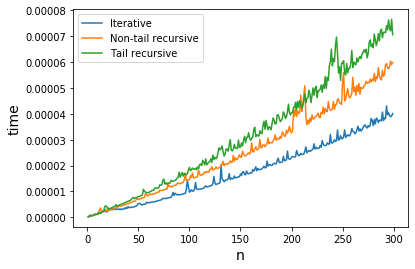

In [9]:
#plot functions
plt.plot(iterative_list[0],iterative_list[1], label = 'Iterative')
plt.plot(non_tail_list[0],non_tail_list[1], label = 'Non-tail recursive')
plt.plot(tail_list[0],tail_list[1], label = 'Tail recursive')
#add labels 
plt.xlabel('n',fontsize =14)
plt.ylabel('time',fontsize =14)
#show legend
plt.legend()
#show plot
plt.show()

iterative slower because recursion makes calls which takes time and space. Tail is better but slower because takes more memory etc 

optomisation arch for each compiler for ints? change to float to get linear line

bigOn^3
MORE

In [10]:
def linear_search(arr, target):
#     print(arr)
#     print(target)
    for i in range(len(arr)):
        if arr[i] == target:
            return True
    return False
    

Below I have implemented a recursive binary search algorithm. This algorithm searches a sorted sequence and repeatedly divides what is to be searched in half. Initially, this algorithm checks if the mid point is equal to the target. If the target is less than the mid point, it then recursively calls the function on the lower half of the sequence. If the target is less than the mid point, it then recursively calls the function on the upper half of the sequence. This algorithm is logn. 

The best case for this algorithm would be if the target was the mid point of the sequence. The worst case would be if the target is at either end of the sequence as these would be the last to be compared to the target. 

I have initialised high to None as I could not assign high to the length of arr within the function call. Within the function I then change high to the length of the array

In [11]:
def recursive_binary(arr, target, low = 0, high = None):
#     print(arr)
#     print(target)
    if high is None: 
        high = len(arr)-1
    if low > high:
        return False
    else:
        mid = (low + high)//2
        if target == arr[mid]:
            return True
        elif target < arr[mid]:
            return recursive_binary(arr, target, low, mid-1)
        else:
            return recursive_binary(arr, target, mid + 1, high)
    

In the cell below we create a sequence of factorials to use as input for the linear search and recursive binary search algorithms defined above. Binary search algorithms only work for sorted arrays. The input given below is already sorted. 

In [12]:
#create empty array
factorial_sequence = []

#invoke the iterative factorial function 1000 times
#append the results of the function into the array

for i in range(1,1000):
    factorial_sequence.append(iterative_fact(i))
    
print()

In [13]:
def binary_search_timer(func, arr, idx):
    setup = "from __main__ import " + func
    
    time_list = []
    n = []
    
    for i in range(len(factorial_sequence), 0, -10):
        n.append(i)
        mycode = func + "(" + str(arr[:i]) + "," + str(arr[:i][idx]) + ")"
        time_list.append(timeit.timeit(setup = setup, 
                                  stmt = mycode, 
                                  number = 10000))

    div = 10000
    binary_times = [x/div for x in time_list]  
    return [n, binary_times]

#target is last element
#need to decrease size
#show worst case

In [14]:
recursive_binary_list = binary_search_timer("recursive_binary", factorial_sequence, -1)
# print(recursive_binary_list[0])
# print(recursive_binary_list[1])

In [24]:
linear_list = binary_search_timer("linear_search", factorial_sequence, -1)
print(linear_list[0])
# print(linear_list[1])

[999, 989, 979, 969, 959, 949, 939, 929, 919, 909, 899, 889, 879, 869, 859, 849, 839, 829, 819, 809, 799, 789, 779, 769, 759, 749, 739, 729, 719, 709, 699, 689, 679, 669, 659, 649, 639, 629, 619, 609, 599, 589, 579, 569, 559, 549, 539, 529, 519, 509, 499, 489, 479, 469, 459, 449, 439, 429, 419, 409, 399, 389, 379, 369, 359, 349, 339, 329, 319, 309, 299, 289, 279, 269, 259, 249, 239, 229, 219, 209, 199, 189, 179, 169, 159, 149, 139, 129, 119, 109, 99, 89, 79, 69, 59, 49, 39, 29, 19, 9]


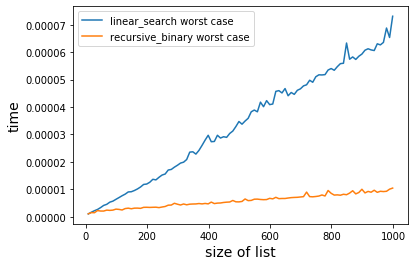

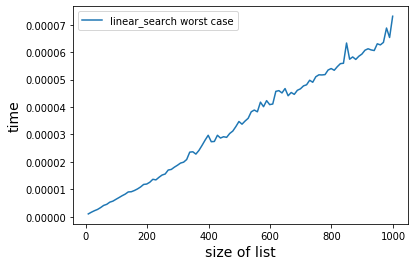

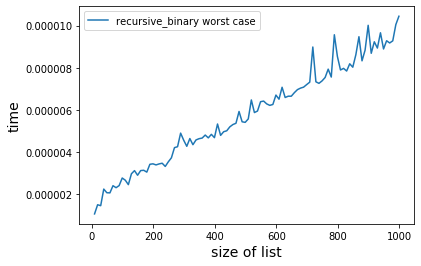

In [16]:
plt.plot(linear_list[0], linear_list[1], label = 'linear_search worst case')
plt.plot(recursive_binary_list[0], recursive_binary_list[1], label = 'recursive_binary worst case')
plt.xlabel('size of list',fontsize =14)
plt.ylabel('time',fontsize =14)
plt.legend()
plt.show()

plt.plot(linear_list[0], linear_list[1], label = 'linear_search worst case')
plt.xlabel('size of list',fontsize =14)
plt.ylabel('time',fontsize =14)
plt.legend()
plt.show()

plt.plot(recursive_binary_list[0], recursive_binary_list[1], label = 'recursive_binary worst case')
plt.xlabel('size of list',fontsize =14)
plt.ylabel('time',fontsize =14)
plt.legend()
plt.show()

In [18]:
# recursive_binary_best_case = binary_search_timer("recursive_binary", factorial_sequence, len(arr[:i])/2)
# print(recursive_binary_list_two[0])
# print(recursive_binary_list_two[1])

NameError: name 'arr' is not defined

In [25]:
# linear_list_best_case = binary_search_timer("linear_search", factorial_sequence, 0)
# print(linear_list_best_case[0])
# print(linear_list_best_case[1])

[999, 989, 979, 969, 959, 949, 939, 929, 919, 909, 899, 889, 879, 869, 859, 849, 839, 829, 819, 809, 799, 789, 779, 769, 759, 749, 739, 729, 719, 709, 699, 689, 679, 669, 659, 649, 639, 629, 619, 609, 599, 589, 579, 569, 559, 549, 539, 529, 519, 509, 499, 489, 479, 469, 459, 449, 439, 429, 419, 409, 399, 389, 379, 369, 359, 349, 339, 329, 319, 309, 299, 289, 279, 269, 259, 249, 239, 229, 219, 209, 199, 189, 179, 169, 159, 149, 139, 129, 119, 109, 99, 89, 79, 69, 59, 49, 39, 29, 19, 9]


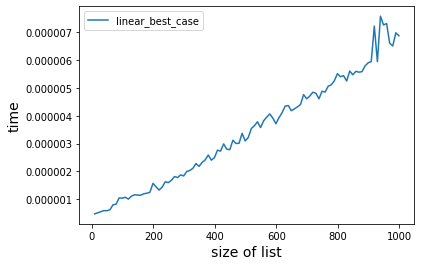

In [21]:
# plt.plot(linear_list_best_case[0], linear_list_best_case[1], label = 'linear_best_case')
# plt.xlabel('size of list',fontsize =14)
# plt.ylabel('time',fontsize =14)
# plt.legend()
# plt.show()

In [ ]:
#plot recursive best case here


# plt.plot(linear_list_best_case[0], linear_list_best_case[1], label = 'linear_best_case')
# plt.xlabel('size of list',fontsize =14)
# plt.ylabel('time',fontsize =14)
# plt.legend()
# plt.show()

https://stackoverflow.com/questions/19165259/python-numpy-scipy-curve-fitting